## Q3: Is there a pattern between the studio popularity and profitability of the top films?


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
#load individual files to individual dataframes
tmdb_movies = pd.DataFrame(pd.read_csv('./zippedData/tmdb.movies.csv'))
imdb_crew = pd.DataFrame(pd.read_csv('./zippedData/imdb.title.crew.csv'))
tn_budgets = pd.DataFrame(pd.read_csv('./zippedData/tn.movie_budgets.csv'))
imdb_ratings = pd.DataFrame(pd.read_csv('./zippedData/imdb.title.ratings.csv'))
imdb_name_basics = pd.DataFrame(pd.read_csv('./zippedData/imdb.name.basics.csv'))
imdb_principals = pd.DataFrame(pd.read_csv('./zippedData/imdb.title.principals.csv'))
imdb_akas = pd.DataFrame(pd.read_csv('./zippedData/imdb.title.akas.csv'))
bom_gross = pd.DataFrame(pd.read_csv('./zippedData/bom.movie_gross.csv'))
imdb_title_basics = pd.DataFrame(pd.read_csv('./zippedData/imdb.title.basics.csv'))

In [3]:
#rename similar title identification columns for cleaner joins

imdb_crew = imdb_crew.rename({'tconst': 'title_id'}, axis=1)
imdb_ratings = imdb_ratings.rename({'tconst': 'title_id'}, axis=1)
imdb_principals = imdb_principals.rename({'tconst': 'title_id'}, axis=1)
imdb_title_basics = imdb_title_basics.rename({'tconst': 'title_id'}, axis=1)
imdb_title_basics = imdb_title_basics.rename({'primary_title': 'movie'}, axis=1)
imdb_name_basics = imdb_name_basics.rename({'nconst': 'crew_id'}, axis=1)
bom_gross = bom_gross.rename({'title': 'movie'}, axis=1)
tmdb_movies = tmdb_movies.rename({'title': 'movie'}, axis=1)


#prepare budget and gross amounts for to_numeric
tn_budgets.production_budget = tn_budgets.production_budget.apply(lambda x: x.strip('$').replace(',',''))
tn_budgets.worldwide_gross = tn_budgets.worldwide_gross.apply(lambda x: x.strip('$').replace(',',''))
tn_budgets.domestic_gross = tn_budgets.domestic_gross.apply(lambda x: x.strip('$').replace(',',''))
#into numbers
tn_budgets[['production_budget', 'worldwide_gross', 'domestic_gross']] = tn_budgets[['production_budget', 
                                                                                     'worldwide_gross', 'domestic_gross']].apply(pd.to_numeric)

In [4]:
tn_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
dtype: object

In [5]:
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [6]:
tn_budgets.eval("total_profit = worldwide_gross - production_budget", inplace=True)
# tn_budgets = tn_budgets.sort_values(['total_profit'], ascending=False)

In [7]:
bom_gross.head()

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
joined_df1 = tn_budgets.merge(bom_gross, left_on='movie', right_on='movie')

#new name studios which are off-shoots of larger studio
joined_df1.replace({'WB (NL)': 'WB', 'FoxS':'Fox'}, inplace=True)

In [9]:
joined_df1.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,total_profit,studio,domestic_gross_y,foreign_gross,year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,BV,241100000.0,804600000,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,BV,459000000.0,946400000,2015
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,BV,678800000.0,"1,369.5",2018
3,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209,WB,229000000.0,428900000,2017
4,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,Sony,200100000.0,680600000,2015


In [10]:
joined_df1 = joined_df1.merge(tmdb_movies, left_on='movie', right_on='movie', left_index=True)

In [11]:
joined_df1.head(20)

,id_x,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,total_profit,studio,domestic_gross_y,foreign_gross,year,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
2470,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,BV,241100000.0,804600000,2011,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
14169,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,BV,459000000.0,946400000,2015,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
23811,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,BV,678800000.0,"1,369.5",2018,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
20623,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209,WB,229000000.0,428900000,2017,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510
23830,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209,WB,229000000.0,428900000,2017,23830,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510
14175,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,Sony,200100000.0,680600000,2015,14175,"[28, 12, 80]",206647,en,Spectre,30.318,2015-11-06,6.4,6719
17386,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,Sony,200100000.0,680600000,2015,17386,"[28, 12, 80]",206647,en,Spectre,30.318,2015-11-06,6.4,6719
5182,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,809439099,WB,448100000.0,636800000,2012,5182,"[28, 80, 18, 53]",49026,en,The Dark Knight Rises,26.220,2012-07-20,7.7,13933
23845,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,118151347,BV,213800000.0,179200000,2018,23845,"[28, 12, 878]",348350,en,Solo: A Star Wars Story,29.502,2018-05-25,6.6,3838
7967,13,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,-14997885,BV,89300000.0,171200000,2013,7967,"[28, 12, 37]",57201,en,The Lone Ranger,12.482,2013-07-03,6.0,3789


In [12]:
joined_df1.drop_duplicates(subset='movie', keep='first', inplace=True)

In [13]:
joined_df1.sort_values(['total_profit'], ascending=False).head()

,id_x,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,total_profit,studio,domestic_gross_y,foreign_gross,year,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
23811,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,BV,678800000.0,"1,369.5",2018,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
14193,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,Uni.,652300000.0,"1,019.4",2015,14193,"[28, 12, 878, 53]",135397,en,Jurassic World,20.709,2015-06-12,6.6,14056
14196,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,Uni.,353000000.0,"1,163.0",2015,14196,"[28, 80, 53]",168259,en,Furious 7,20.396,2015-04-03,7.3,6538
3444,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,BV,700100000.0,646900000,2018,3444,"[28, 16]",86841,en,Black Panther,2.058,2011-01-18,5.1,11
23829,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,Uni.,417700000.0,891800000,2018,23829,"[28, 12, 878]",351286,en,Jurassic World: Fallen Kingdom,34.958,2018-06-22,6.5,5995


In [14]:
def sort_list(data, col):
    data = data.sort_values(by=col, ascending=False, inplace=True)

In [49]:
#find the number of movies created by each, individual studio
joined_df2 = joined_df1.groupby(['studio'])['movie'].nunique().sort_values(ascending=False).head(10)
by_profit = joined_df1.sort_values(['total_profit'], ascending=False).head(117)
by_popularity = joined_df1.sort_values(['popularity'], ascending=False).head(117)
studio_for_top10 = by_profit.groupby(['studio'])['movie'].nunique().sort_values(ascending=False).head(117)
studio_for_top_pop = by_popularity.groupby(['studio'])['movie'].nunique().sort_values(ascending=False).head(117)

least_profit = joined_df1.sort_values(['total_profit']).head(50)
least_popularity = joined_df1.sort_values(['popularity']).head(50)
studio_for_bot10 = least_profit.groupby(['studio'])['movie'].nunique().sort_values(ascending=False).head(50)
studio_for_bot_pop = least_popularity.groupby(['studio'])['movie'].nunique().sort_values(ascending=False).head(50)

In [50]:
joined_df2

studio
Fox      153
WB       132
Uni.     115
Par.      72
BV        71
Sony      68
LGF       56
Wein.     39
Focus     36
SPC       27
Name: movie, dtype: int64

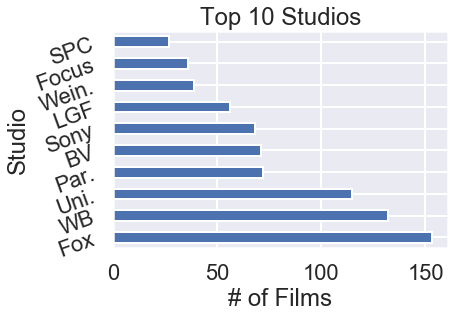

In [51]:
# plt.rcParams.update({'font.size': 18})

sns.set()
sns.set_context('poster')
chart = joined_df2.plot(kind='barh')
chart.set_yticklabels(chart.get_yticklabels(), rotation=20)
plt.ylabel('Studio')
plt.xlabel('# of Films')
plt.title('Top 10 Studios')
plt.show()

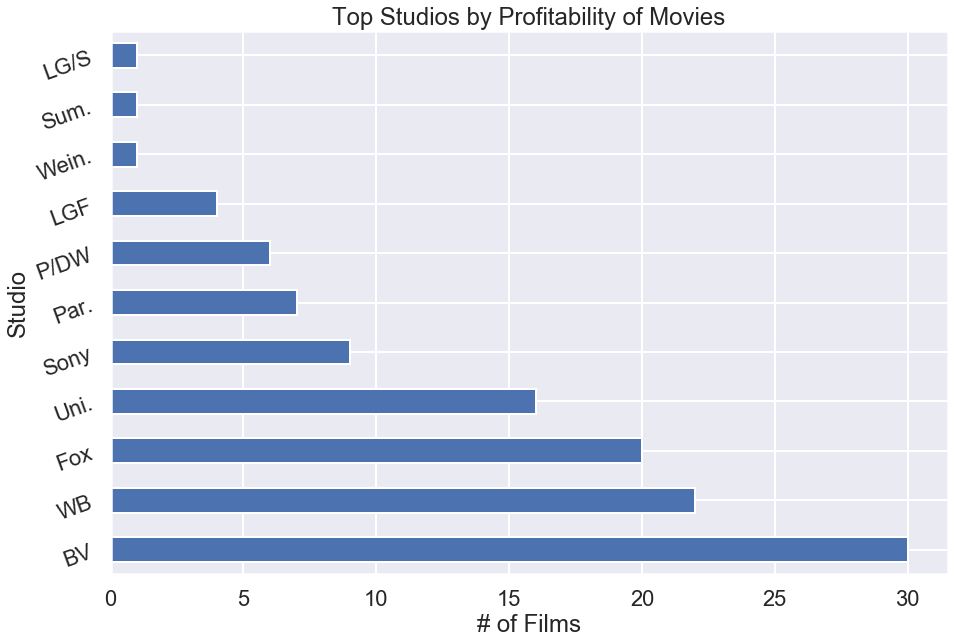

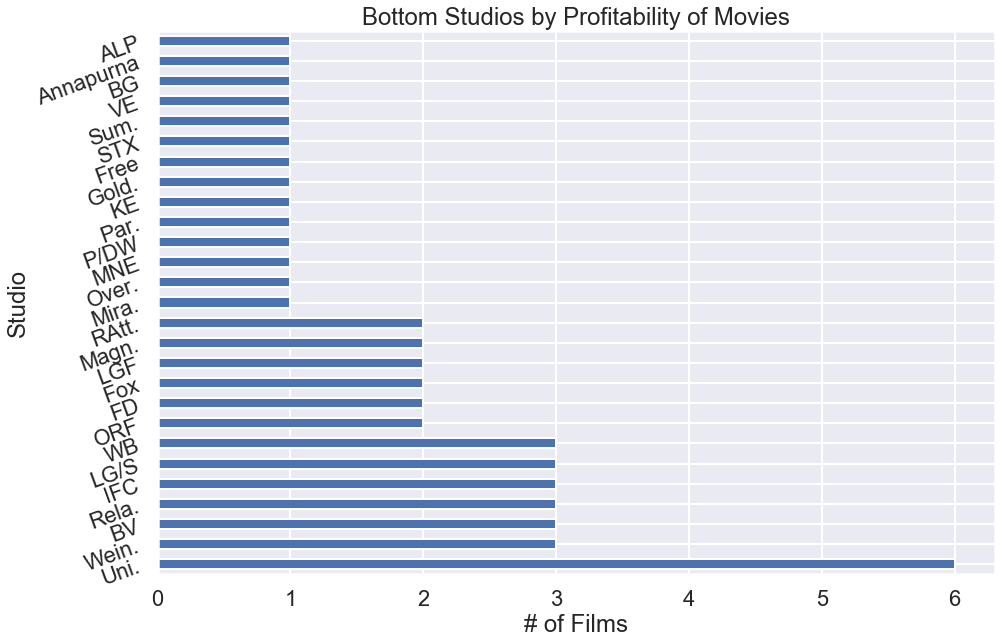

In [43]:
plt.rcParams.update({'font.size': 22})

sns.set()
sns.set_context('poster')
chart = studio_for_top10.plot(kind='barh', figsize=(15,10))
chart.set_yticklabels(chart.get_yticklabels(), rotation=20)
plt.ylabel('Studio')
plt.xlabel('# of Films')
plt.title('Top Studios by Profitability of Movies')
plt.show()

sns.set()
sns.set_context('poster')
chart = studio_for_bot10.plot(kind='barh', figsize=(15,10))
chart.set_yticklabels(chart.get_yticklabels(), rotation=20)
plt.ylabel('Studio')
plt.xlabel('# of Films')
plt.title('Bottom Studios by Profitability of Movies')
plt.show()

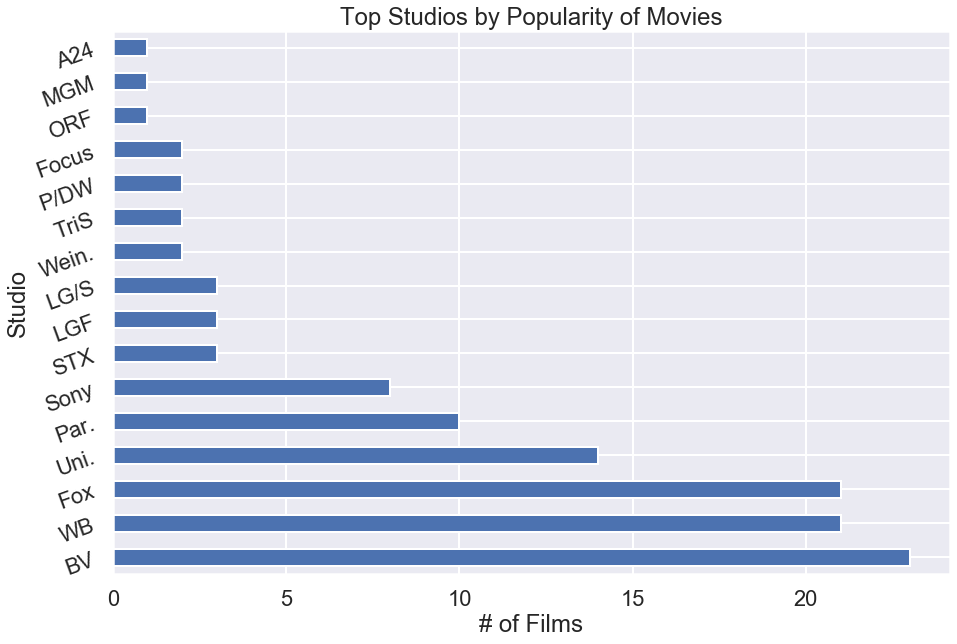

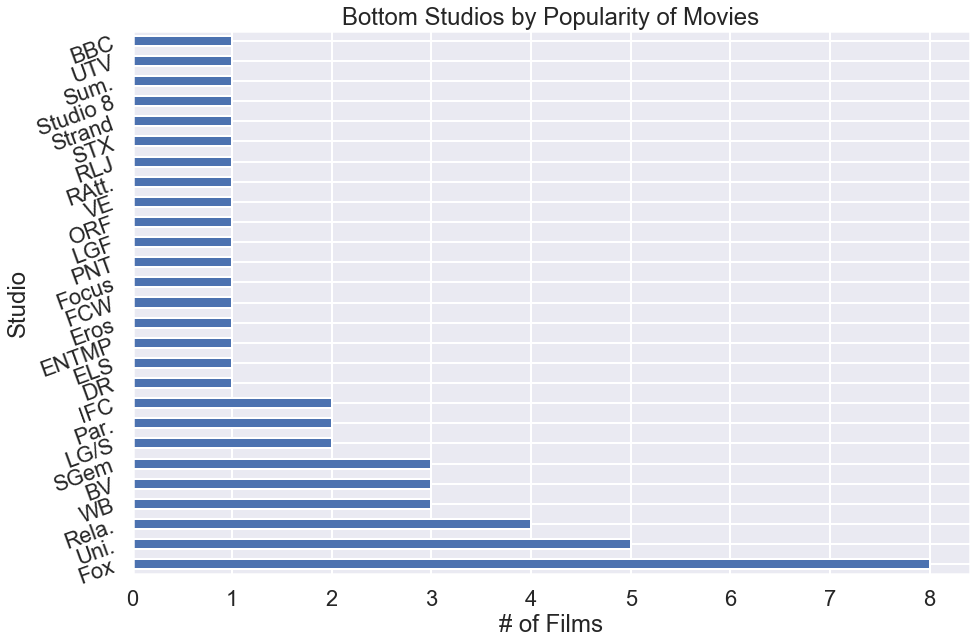

In [44]:
plt.rcParams.update({'font.size': 22})

sns.set()
sns.set_context('poster')
chart = studio_for_top_pop.plot(kind='barh', figsize=(15,10))
chart.set_yticklabels(chart.get_yticklabels(), rotation=20)
plt.ylabel('Studio')
plt.xlabel('# of Films')
plt.title('Top Studios by Popularity of Movies')
plt.show()

sns.set()
sns.set_context('poster')
chart = studio_for_bot_pop.plot(kind='barh', figsize=(15,10))
chart.set_yticklabels(chart.get_yticklabels(), rotation=20)
plt.ylabel('Studio')
plt.xlabel('# of Films')
plt.title('Bottom Studios by Popularity of Movies')
plt.show()

### Insights/Findings/Recommendations

**Findings**

After looking into the relationship between the most profitable and most popular movies and which studios produce them, I found that most the studios who produce the most movies

**Recommendations**


**Next Steps**
* Plan on exploring further correlations between profitability and directors, studios, and international releases  
* If the number of regions where a title is theatrically released isn't a factor in profitability, plan on identifying the most profitable international regions and compare performance to domestic profit